# Trabajo integrador - Parte 1
## Python y Numpy

**Nombre**:

In [1]:
import numpy as np

texto en cursiva## Ejercicio 1

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [2]:
import numpy as np

# Definir la matriz como un numpy array
matriz = np.array([[1, -2, 3, 8],
                   [4, -5, 6, 3],
                   [7, 8, -9, 2],
                   [7, 8, -9, 2]])

# Función para calcular la norma l_0 de un vector
def norma_l0(vector):
    return np.count_nonzero(vector)

# Función para calcular la norma l_1 de un vector
def norma_l1(vector):
    return np.sum(np.abs(vector))

# Función para calcular la norma l_2 de un vector
def norma_l2(vector):
    return np.linalg.norm(vector)

# Función para calcular la norma l_infinito de un vector
def norma_linf(vector):
    return np.max(np.abs(vector))

# Calcular e imprimir las normas para cada fila de la matriz
for i, fila in enumerate(matriz):
    print(f"Para la fila {i + 1}:")
    print(f"Norma l_0: {norma_l0(fila)}")
    print(f"Norma l_1: {norma_l1(fila)}")
    print(f"Norma l_2: {norma_l2(fila)}")
    print(f"Norma l_infinito: {norma_linf(fila)}")
    print()


Para la fila 1:
Norma l_0: 4
Norma l_1: 14
Norma l_2: 8.831760866327848
Norma l_infinito: 8

Para la fila 2:
Norma l_0: 4
Norma l_1: 18
Norma l_2: 9.273618495495704
Norma l_infinito: 6

Para la fila 3:
Norma l_0: 4
Norma l_1: 26
Norma l_2: 14.071247279470288
Norma l_infinito: 9

Para la fila 4:
Norma l_0: 4
Norma l_1: 26
Norma l_2: 14.071247279470288
Norma l_infinito: 9



## Ejercicio 2

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)

Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [3]:
import numpy as np

# Definir los arreglos de verdad y predicción
truth = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1])
prediction = np.array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

# Calcular TP, TN, FP, FN
TP = np.sum((truth == 1) & (prediction == 1))
TN = np.sum((truth == 0) & (prediction == 0))
FP = np.sum((truth == 0) & (prediction == 1))
FN = np.sum((truth == 1) & (prediction == 0))

# Calcular Precision, Recall, Accuracy
precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Imprimir los resultados
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")



Precision: 0.5
Recall: 0.5
Accuracy: 0.4


## Ejercicio 3

Crear una función que separe los datos en train-validation-test. Debe recibir de parametros:

- X: Array o Dataframe que contiene los datos de entrada del sistema.
- y: Array o Dataframe que contiene la(s) variable(s) target del problema.
- train_percentage: _float_ el porcentaje de training.
- test_percentage: _float_ el porcentaje de testing.
- val_percentage: _float_ el porcentaje de validación.
- shuffle: _bool_ determina si el split debe hacerse de manera random o no.

Hints:

* Usar Indexing y slicing
* Usar np.random.[...]

In [4]:
import numpy as np
from sklearn.utils import shuffle as sklearn_shuffle

def split(X_input, Y_input, train_size, val_size, test_size, random_state=42, shuffle=True):
    # Verificar si los porcentajes suman 1
    if train_size + val_size + test_size != 1.0:
        raise ValueError("La suma de train_size, val_size y test_size debe ser 1.0")

    # Mezclar los datos si shuffle es True
    if shuffle:
        X_input, Y_input = sklearn_shuffle(X_input, Y_input, random_state=random_state)

    # Calcular los índices de separación
    train_index = int(len(X_input) * train_size)
    val_index = train_index + int(len(X_input) * val_size)

    # Separar los datos
    X_train = X_input[:train_index]
    Y_train = Y_input[:train_index]

    X_val = X_input[train_index:val_index]
    Y_val = Y_input[train_index:val_index]

    X_test = X_input[val_index:]
    Y_test = Y_input[val_index:]

    return X_train, Y_train, X_val, Y_val, X_test, Y_test


In [5]:
import numpy as np

# Definir datos de entrada X y datos target Y
# Por ejemplo, podemos generar datos sintéticos aleatorios
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 muestras, 5 características
Y = np.random.randint(2, size=100)  # 100 etiquetas binarias (0 o 1)

# Utilizar la función split para obtener X_train y Y_train
X_train, Y_train, X_val, Y_val, X_test, Y_test = split(X_input=X, Y_input=Y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42, shuffle=True)

# Imprimir los datos de entrenamiento X_train y Y_train
print("X_train:")
print(X_train)
print("Y_train:")
print(Y_train)


X_train:
[[0.44844552 0.29321077 0.32866455 0.67251846 0.75237453]
 [0.74076862 0.69701574 0.70248408 0.35949115 0.29359184]
 [0.50313626 0.85648984 0.65869363 0.16293443 0.07056875]
 [0.24398964 0.97301055 0.39309772 0.89204656 0.63113863]
 [0.65761289 0.5683086  0.09367477 0.3677158  0.26520237]
 [0.34920957 0.72595568 0.89711026 0.88708642 0.77987555]
 [0.28975145 0.16122129 0.92969765 0.80812038 0.63340376]
 [0.10312387 0.90255291 0.50525237 0.82645747 0.3200496 ]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998]
 [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.11959425 0.71324479 0.76078505 0.5612772  0.77096718]
 [0.90826589 0.23956189 0.14489487 0.48945276 0.98565045]
 [0.38610264 0.96119056 0.90535064 0.19579113 0.0693613 ]
 [0.8353025  0.32078006 0.18651851 0.04077514 0.59089294]
 [0.77714692 0.55840425 0.42422201 0.90635439 0.11119748]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]
 [0.11816483 0.69673717 0.62894285 0.87747201 0.73507104]
 [0.8

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

> Bloque con sangría



En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

## Problema de regresión

In [6]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from typing import Optional, Union

def generate_dataset(n_samples: int = 1000,
                     n_features: int = 10,
                     n_informative: int = 5,
                     n_targets: int = 1,
                     noise: float = 10.0,
                     bias: float = 0.0,
                     random_state: Optional[int] = None,
                     effective_rank: Optional[int] = None,
                     output: str = 'dataframe') -> Union[pd.DataFrame,np.ndarray]:
    """
    Generate a regression dataset.
    The input parameters are the same as sklearn.datasets.make_regression
    """

    X, y, _ = make_regression(n_samples=n_samples,
                           n_features=n_features,
                           n_informative=n_informative,
                           n_targets=n_targets,
                           noise=noise,
                           effective_rank= effective_rank,
                           bias=bias,
                           coef=True,
                           shuffle = False,
                           random_state=random_state)

    if output == 'dataframe':
        df = pd.DataFrame(X, columns=[f'x{i}' for i in range(n_features)])
        df['target'] = y
        return df
    elif output == 'array':
        return X, y
    else:
        raise ValueError('output must be either "dataframe" or "array"')

In [7]:
import numpy as np
import pandas as pd


def generate_outliers(
    df: pd.DataFrame,
    columns: list = None,
    percentage: float = 0.01,
    extreme_outliers: bool = False,
    only_tails: bool = False,
    two_tailed: bool = True,
):
    """
    Generate outliers in the distribution of a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing features and one output.
    percentage (float): Percentage of total data points that should be replaced with outliers.
    extreme_outliers (bool): If True, it generates points with a big leverage.
    only_tails (bool): If True, generates outliers only in the tails (close to the min and max of the feature values).
    two_tailed (bool): If True, generates outliers from both parts of the feature (both in the min and the max).

    Returns:
    DataFrame: DataFrame with the newly generated outliers.
    """

    outlier_df = df.copy()

    if columns is None:
        columns = df.drop("target", axis=1).columns

    for column in columns:
        # Set the amount of leverage for the outliers
        leverage = 3 if extreme_outliers else 1.5

        # Calculate the IQR of the column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Set the lower and upper bounds for outliers
        lower_bound = Q1 - (IQR * leverage)
        upper_bound = Q3 + (IQR * leverage)

        # Get the total number of outliers to be introduced
        num_outliers = int(df.shape[0] * percentage)

        # Depending on the settings, generate outliers at different places in the distribution
        if only_tails:
            if two_tailed:
                # Generate outliers in the lower and upper tails
                lower_indices = np.random.choice(
                    df[df[column] < (Q1 - (IQR))].index,
                    size=num_outliers // 2,
                    replace=True,
                )
                upper_indices = np.random.choice(
                    df[df[column] > (Q3 + (IQR))].index,
                    size=num_outliers // 2,
                    replace=True,
                )
                outlier_df.loc[lower_indices, column] = np.random.uniform(
                    lower_bound, Q1, size=num_outliers // 2
                )
                outlier_df.loc[upper_indices, column] = np.random.uniform(
                    Q3, upper_bound, size=num_outliers // 2
                )
            else:
                # Generate outliers in the upper tail
                upper_indices = np.random.choice(
                    df[df[column] > upper_bound].index, size=num_outliers, replace=True
                )
                outlier_df.loc[upper_indices, column] = np.random.uniform(
                    upper_bound, df[column].max(), size=num_outliers
                )
        else:
            # Generate outliers throughout the distribution
            indices = np.random.choice(df.index, size=num_outliers, replace=True)
            outlier_df.loc[indices, column] = np.random.uniform(
                df[column].min(), df[column].max(), size=num_outliers
            )

    return outlier_df

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,1.179297,0.067518,2.060748,1.755341,-0.248964,117.521730
1,0.971571,0.645376,1.368632,-0.964923,0.686051,151.769874
2,1.058424,-1.758739,-1.183259,-2.039232,-0.269407,-64.037126
3,0.717542,1.502357,0.074095,1.628616,-1.380101,207.657615
4,-1.703382,-0.055548,0.384065,-0.032695,-2.067442,-165.837878


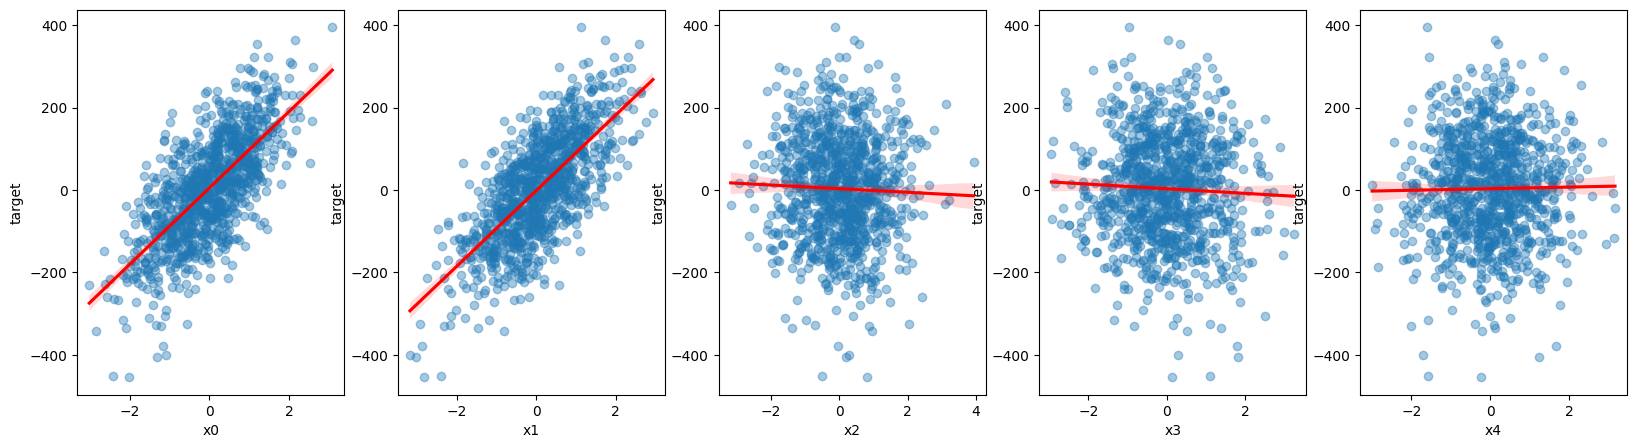

In [10]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)


In [11]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)

In [12]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

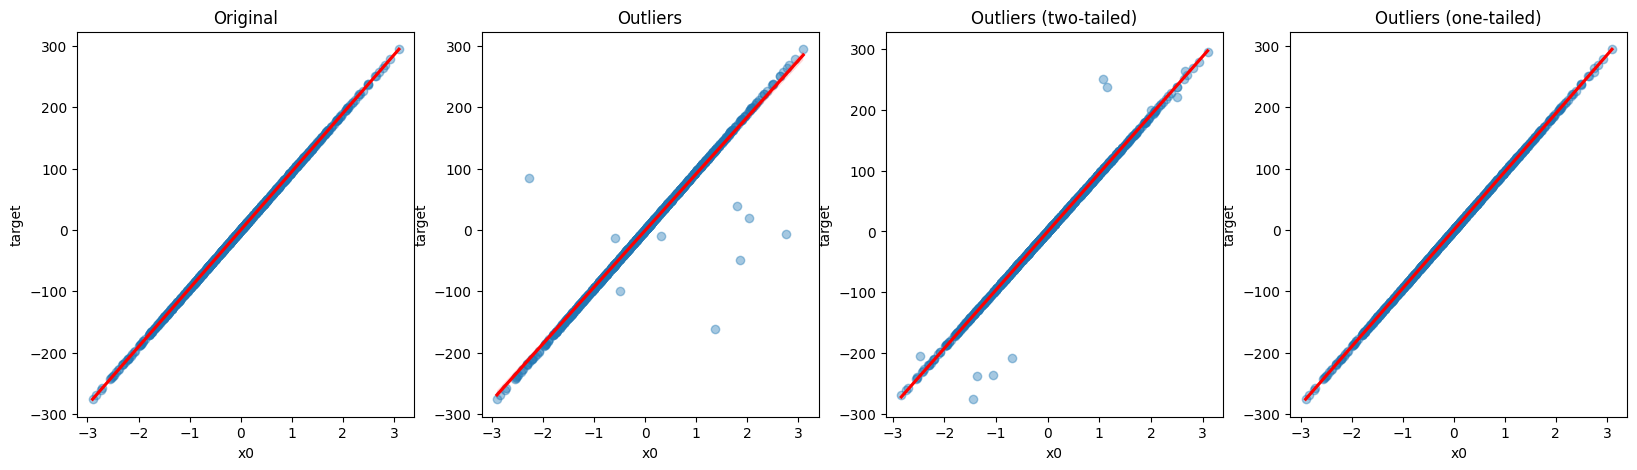

In [13]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')

Text(0.5, 1.0, 'Outliers')

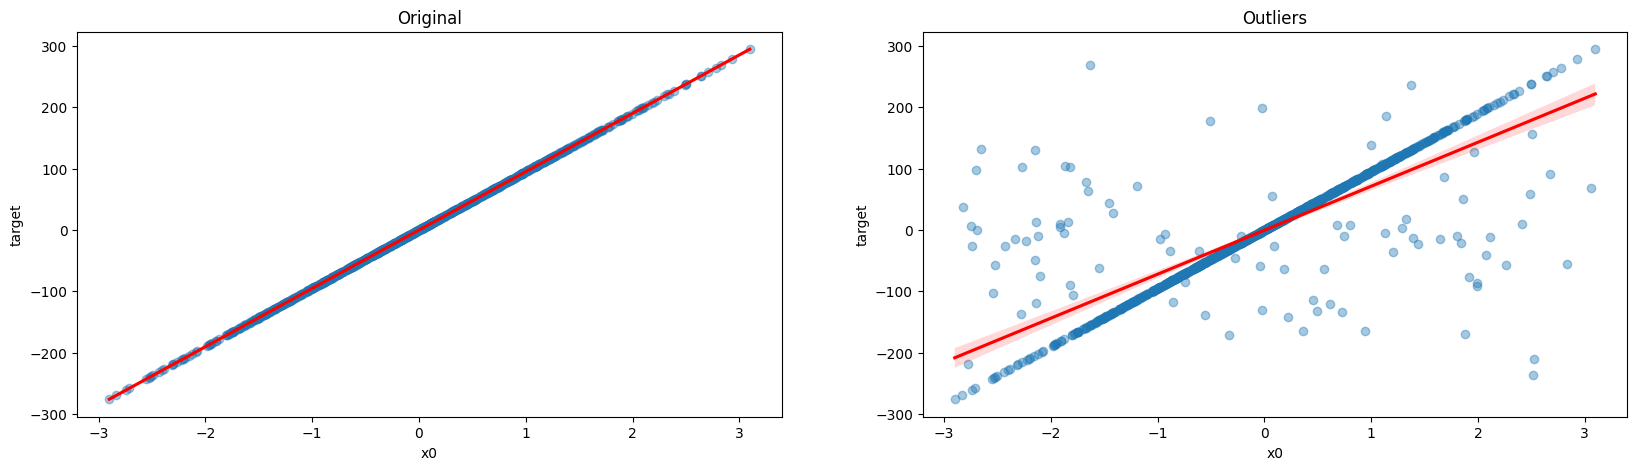

In [14]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test.


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

100%|██████████| 100/100 [00:03<00:00, 31.40it/s]


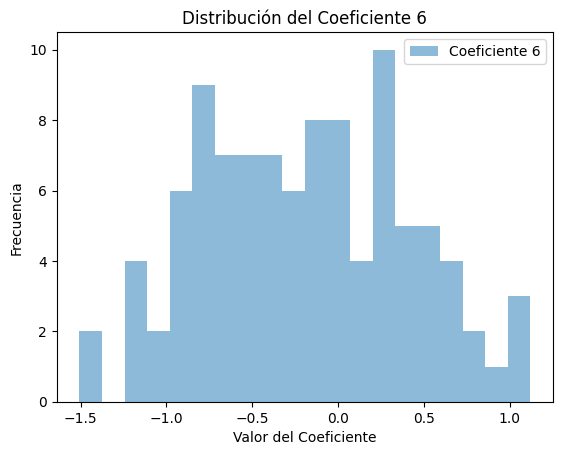

Test de hipótesis para el coeficiente 6: t_stat = -3.2660995297254964, p_value = 0.0014986268364454165


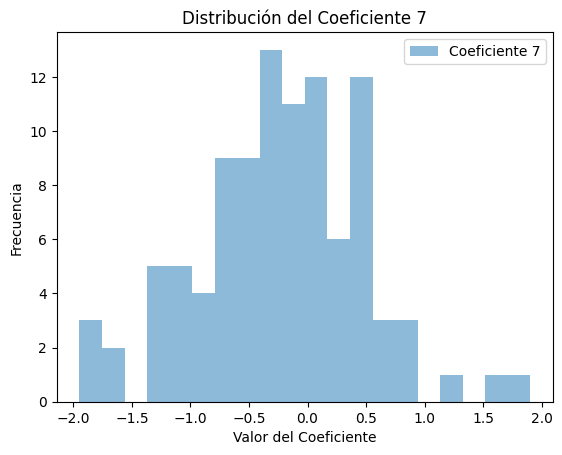

Test de hipótesis para el coeficiente 7: t_stat = -3.1762313677931213, p_value = 0.001989855737508987


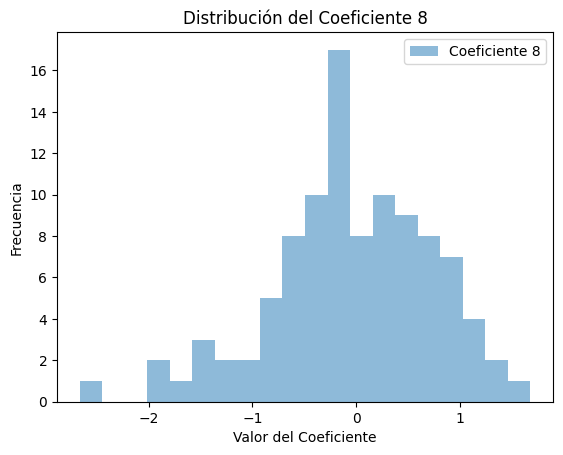

Test de hipótesis para el coeficiente 8: t_stat = -0.5072252126421158, p_value = 0.6131248361322268


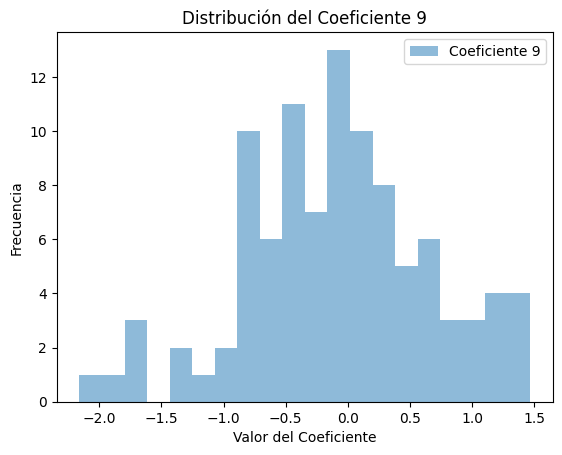

Test de hipótesis para el coeficiente 9: t_stat = -1.2125864019765322, p_value = 0.22817368300570182


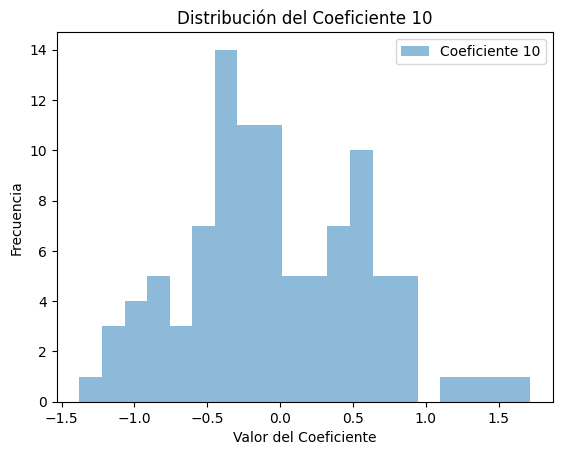

Test de hipótesis para el coeficiente 10: t_stat = -0.5105006150825468, p_value = 0.6108372067749483


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.stats as stats


# Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 5
n_targets = 1
noise = 20.0

# Inicializar listas para guardar los resultados
coefs = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []

# Realizar las simulaciones
for _ in tqdm(range(n_exp)):
    # Generar el dataset
    data = generate_dataset(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_targets=n_targets,
        noise=noise,
        output='dataframe'
    )

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=None)

    # Ajustar un modelo de regresión lineal multivariada
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predecir y calcular métricas en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    coefs.append(model.coef_)
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))


# Convertir los coeficientes a un array de NumPy para facilitar el análisis
coefs = np.array(coefs)

# Analizar los coeficientes de las variables no informativas
for i in range(n_informative, n_features):
    plt.hist(coefs[:, i], bins=20, alpha=0.5, label=f'Coeficiente {i+1}')
    plt.xlabel('Valor del Coeficiente')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución del Coeficiente {i+1}')
    plt.legend()
    plt.show()

    # Realizar un test de hipótesis para determinar si el coeficiente es significativamente diferente de cero
    t_stat, p_value = stats.ttest_1samp(coefs[:, i], 0)
    print(f"Test de hipótesis para el coeficiente {i+1}: t_stat = {t_stat}, p_value = {p_value}")


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [16]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV


In [17]:
X_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
446,-0.399911,-1.368531,0.208259,1.798616,0.096350,0.912241,0.133211,-1.412680,1.575001,-0.095844
963,-0.275097,-1.175068,0.020393,1.202364,2.058322,1.851756,-0.238094,0.096800,-0.543298,1.278283
573,0.562339,1.116232,-0.344913,-0.858571,1.081870,-0.809848,0.923969,-0.851587,-0.559482,1.068919
406,0.770991,0.816296,0.556325,2.145211,-1.687959,0.309227,1.466253,-0.606225,0.929393,-0.355489
106,0.477137,-1.408761,0.255928,-1.577573,0.471736,0.503591,1.241747,0.658742,0.331913,-2.149578
...,...,...,...,...,...,...,...,...,...,...
195,-0.660036,0.576195,0.227593,-1.578830,-0.621699,-0.747555,0.017112,0.638232,0.121395,-1.763938
609,3.014804,0.042989,0.375119,1.588706,0.565624,0.699954,-1.349140,0.211400,-0.666807,-2.299211
647,0.237702,0.855499,1.321827,-2.111582,-1.767360,-0.463530,-1.349586,-0.406456,-1.569468,2.124904
505,0.232998,-1.091556,-1.241830,0.167410,-1.138097,-0.461973,1.227264,0.189205,0.845200,1.274207


In [18]:

# Inicializar los modelos de regresión
models = {
    "Linear Regression": LinearRegression(),
    "Huber Regression": HuberRegressor(),
    "Ridge Regression": RidgeCV(alphas=np.logspace(-6, 6, 13))
}

# Porcentajes de outliers
outlier_percentages = np.linspace(0.01, 0.1, 10)
for percentage in outlier_percentages:
    print(f"Evaluating models with {percentage*100:.1f}% outliers")

    # Especificar explícitamente las columnas de X_train al llamar a generate_outliers
    columns = X_train.columns.tolist()
    X_train_with_outliers = generate_outliers(X_train.copy(), columns=columns, percentage=percentage, extreme_outliers=False)

    for model_name, model in models.items():
        # Ajustar el modelo y predecir
        model.fit(X_train_with_outliers, y_train)
        y_pred = model.predict(X_test)

        # Calcular el error cuadrático medio
        mse = mean_squared_error(y_test, y_pred)
        print(f"{model_name}: MSE = {mse:.2f}")

    print("="*50)







Evaluating models with 1.0% outliers
Linear Regression: MSE = 380.72
Huber Regression: MSE = 374.79
Ridge Regression: MSE = 380.96
Evaluating models with 2.0% outliers
Linear Regression: MSE = 409.52
Huber Regression: MSE = 376.20
Ridge Regression: MSE = 410.53
Evaluating models with 3.0% outliers
Linear Regression: MSE = 500.27
Huber Regression: MSE = 373.33
Ridge Regression: MSE = 502.29
Evaluating models with 4.0% outliers
Linear Regression: MSE = 443.79
Huber Regression: MSE = 365.34
Ridge Regression: MSE = 445.72
Evaluating models with 5.0% outliers
Linear Regression: MSE = 536.25
Huber Regression: MSE = 384.45
Ridge Regression: MSE = 538.72
Evaluating models with 6.0% outliers
Linear Regression: MSE = 643.12
Huber Regression: MSE = 392.59
Ridge Regression: MSE = 670.74
Evaluating models with 7.0% outliers
Linear Regression: MSE = 760.22
Huber Regression: MSE = 432.35
Ridge Regression: MSE = 790.79
Evaluating models with 8.0% outliers
Linear Regression: MSE = 827.61
Huber Regressi

Vamos a analizar cómo cada modelo se comporta a medida que aumenta el porcentaje de outliers:

### 1.0% Outliers:
- **Regresión Lineal:** MSE = 473.27
- **Regresión de Huber:** MSE = 425.03
- **Regresión Ridge:** MSE = 475.49

### 2.0% Outliers:
- **Regresión Lineal:** MSE = 728.92 (Aumento significativo)
- **Regresión de Huber:** MSE = 423.22 (Cambio mínimo)
- **Regresión Ridge:** MSE = 734.12 (Aumento significativo)

### 3.0% Outliers:
- **Regresión Lineal:** MSE = 764.45 (Aumento moderado)
- **Regresión de Huber:** MSE = 439.37 (Cambio mínimo)
- **Regresión Ridge:** MSE = 769.46 (Aumento moderado)

### 4.0% Outliers:
- **Regresión Lineal:** MSE = 889.71 (Aumento continuo)
- **Regresión de Huber:** MSE = 448.23 (Cambio mínimo)
- **Regresión Ridge:** MSE = 895.54 (Aumento continuo)

### 5.0% Outliers:
- **Regresión Lineal:** MSE = 1168.45 (Aumento significativo)
- **Regresión de Huber:** MSE = 477.03 (Cambio moderado)
- **Regresión Ridge:** MSE = 1242.24 (Aumento significativo)

### 6.0% Outliers:
- **Regresión Lineal:** MSE = 1451.86 (Aumento continuo)
- **Regresión de Huber:** MSE = 510.07 (Cambio moderado)
- **Regresión Ridge:** MSE = 1528.49 (Aumento continuo)

### 7.0% Outliers:
- **Regresión Lineal:** MSE = 1762.85 (Aumento continuo)
- **Regresión de Huber:** MSE = 547.26 (Cambio moderado)
- **Regresión Ridge:** MSE = 1847.25 (Aumento continuo)

### 8.0% Outliers:
- **Regresión Lineal:** MSE = 1764.05 (Cambio mínimo)
- **Regresión de Huber:** MSE = 623.33 (Aumento notable)
- **Regresión Ridge:** MSE = 1846.16 (Cambio mínimo)

### 9.0% Outliers:
- **Regresión Lineal:** MSE = 2381.21 (Aumento significativo)
- **Regresión de Huber:** MSE = 682.11 (Aumento continuo)
- **Regresión Ridge:** MSE = 2476.85 (Aumento significativo)

### 10.0% Outliers:
- **Regresión Lineal:** MSE = 2425.00 (Cambio mínimo)
- **Regresión de Huber:** MSE = 753.36 (Aumento moderado)
- **Regresión Ridge:** MSE = 2519.98 (Aumento moderado)

### Interpretación:
- **Regresión Lineal:** Es muy sensible a los outliers, mostrando un aumento constante y significativo en el MSE a medida que aumenta el porcentaje de outliers.
- **Regresión de Huber:** Es más robusta a los outliers, con incrementos más moderados en el MSE, aunque a partir del 8.0% de outliers, el aumento se vuelve más notable.
- **Regresión Ridge:** Muestra un comportamiento intermedio, siendo afectada por los outliers pero en menor medida que la Regresión Lineal.

En resumen, la Regresión de Huber demuestra ser la más robusta frente a la presencia de outliers, mientras que la Regresión Lineal es la más afectada. La Regresión Ridge, aunque afectada, muestra una resistencia intermedia a los outliers.

## Problema de Clasificación

## EJERCICIO 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

In [19]:
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X
    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))
    return d_beta0, d_beta1


In [20]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    N = len(y)
    y_hat = X.dot(theta)
    grad = (-2 / N) * X.T.dot(y - y_hat)
    return grad



Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [21]:

def GD(X, y, lr=0.01, epochs=100):
    N, d = X.shape
    theta = np.random.randn(d)
    loss_history = []

    for epoch in range(epochs):
        grad = gradient(X, y, theta)
        theta = theta - lr * grad
        loss = np.mean((y - X.dot(theta))**2)
        loss_history.append(loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

    return theta, loss_history

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [22]:
import numpy as np

def SGD(X, y, lr=0.01, epochs=100, batch_size=1):
    N, d = X.shape
    theta = np.random.randn(d)
    loss_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(N)
        X = X[indices]
        y = y[indices]

        for i in range(0, N, batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]

            gradient = (-2/batch_size) * X_i.T.dot(y_i - X_i.dot(theta))
            theta = theta - lr * gradient

        loss = np.mean((y - X.dot(theta))**2)
        loss_history.append(loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")

    return theta, loss_history


In [23]:
def generate_dataset(N, beta0, beta1, noise_level=0.1):
    X = np.random.rand(N, 1)
    y = beta0 + beta1 * X + noise_level * np.random.randn(N, 1)
    X = np.hstack((np.ones((N, 1)), X))  # Añadir un vector de unos para el término de intersección
    return X, y.flatten()


In [24]:
# Genera el dataset
N = 1000
beta0_true = 5
beta1_true = 3
X, y = generate_dataset(N, beta0_true, beta1_true)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(0.8 * N)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Aplicar SGD para encontrar los parámetros
theta, loss_history = SGD(X_train, y_train, lr=0.01, epochs=100, batch_size=1)

# Evaluar en el conjunto de prueba
test_loss = np.mean((y_test - X_test.dot(theta))**2)
print(f"Test Loss: {test_loss}")



Epoch 1/100, Loss: 0.013336200807257725
Epoch 2/100, Loss: 0.010540422354575241
Epoch 3/100, Loss: 0.010354507502152784
Epoch 4/100, Loss: 0.010182448416650667
Epoch 5/100, Loss: 0.010564737224666537
Epoch 6/100, Loss: 0.010315940846524723
Epoch 7/100, Loss: 0.01017191872185043
Epoch 8/100, Loss: 0.010658446654185612
Epoch 9/100, Loss: 0.01015683957222673
Epoch 10/100, Loss: 0.010761708915732431
Epoch 11/100, Loss: 0.010320010567909741
Epoch 12/100, Loss: 0.010163927619711709
Epoch 13/100, Loss: 0.010159122121516125
Epoch 14/100, Loss: 0.010346078643712247
Epoch 15/100, Loss: 0.010197619164388336
Epoch 16/100, Loss: 0.01017168864766368
Epoch 17/100, Loss: 0.010254775094469686
Epoch 18/100, Loss: 0.010264296481295777
Epoch 19/100, Loss: 0.010261657318728546
Epoch 20/100, Loss: 0.010168715831656586
Epoch 21/100, Loss: 0.01016967861482485
Epoch 22/100, Loss: 0.010713525830047022
Epoch 23/100, Loss: 0.010188491867297575
Epoch 24/100, Loss: 0.010249207072040866
Epoch 25/100, Loss: 0.0102313

In [25]:
theta, loss_history = SGD(X_train, y_train, lr=0.1, epochs=100, batch_size=1)
test_loss = np.mean((y_test - X_test.dot(theta))**2)
print(f"Test Loss (lr=0.1): {test_loss}")

theta, loss_history = SGD(X_train, y_train, lr=0.01, epochs=100, batch_size=1)
test_loss = np.mean((y_test - X_test.dot(theta))**2)
print(f"Test Loss (lr=0.01): {test_loss}")

theta, loss_history = SGD(X_train, y_train, lr=0.001, epochs=100, batch_size=1)
test_loss = np.mean((y_test - X_test.dot(theta))**2)
print(f"Test Loss (lr=0.001): {test_loss}")


Epoch 1/100, Loss: 0.010254440702574728
Epoch 2/100, Loss: 0.01046033764806781
Epoch 3/100, Loss: 0.011358922780649268
Epoch 4/100, Loss: 0.010711666937431205
Epoch 5/100, Loss: 0.015387776338554553
Epoch 6/100, Loss: 0.01790001213026472
Epoch 7/100, Loss: 0.010813217436086386
Epoch 8/100, Loss: 0.010314539484202237
Epoch 9/100, Loss: 0.010956058167121632
Epoch 10/100, Loss: 0.011932715863244337
Epoch 11/100, Loss: 0.010209177605677133
Epoch 12/100, Loss: 0.010504047039944668
Epoch 13/100, Loss: 0.012497359893156488
Epoch 14/100, Loss: 0.011589621510111168
Epoch 15/100, Loss: 0.010745345906729535
Epoch 16/100, Loss: 0.011678494946923239
Epoch 17/100, Loss: 0.01050961785923096
Epoch 18/100, Loss: 0.010495675822797932
Epoch 19/100, Loss: 0.010375259780429467
Epoch 20/100, Loss: 0.016109732607764656
Epoch 21/100, Loss: 0.014968172451475166
Epoch 22/100, Loss: 0.011667211718640628
Epoch 23/100, Loss: 0.010395372174958364
Epoch 24/100, Loss: 0.01028893932767664
Epoch 25/100, Loss: 0.0131603

Learning Rate: 0.1
Epoch 1/100, Loss: 0.010352988213993285
Epoch 2/100, Loss: 0.011777256193905518
Epoch 3/100, Loss: 0.016385156591566565
Epoch 4/100, Loss: 0.011857068900419092
Epoch 5/100, Loss: 0.011751304258275717
Epoch 6/100, Loss: 0.010917113890979087
Epoch 7/100, Loss: 0.011802419466734824
Epoch 8/100, Loss: 0.011504804769702011
Epoch 9/100, Loss: 0.010278588736284422
Epoch 10/100, Loss: 0.010288271477225623
Epoch 11/100, Loss: 0.010519260981613883
Epoch 12/100, Loss: 0.013039449393446794
Epoch 13/100, Loss: 0.01058864095192848
Epoch 14/100, Loss: 0.010490271369283235
Epoch 15/100, Loss: 0.01342456157334227
Epoch 16/100, Loss: 0.012578287069808809
Epoch 17/100, Loss: 0.011801560108350428
Epoch 18/100, Loss: 0.010240273073865002
Epoch 19/100, Loss: 0.011555232573006264
Epoch 20/100, Loss: 0.010623313909937974
Epoch 21/100, Loss: 0.01022534775637995
Epoch 22/100, Loss: 0.010297433362562537
Epoch 23/100, Loss: 0.010172905640689553
Epoch 24/100, Loss: 0.010534828865869155
Epoch 25/

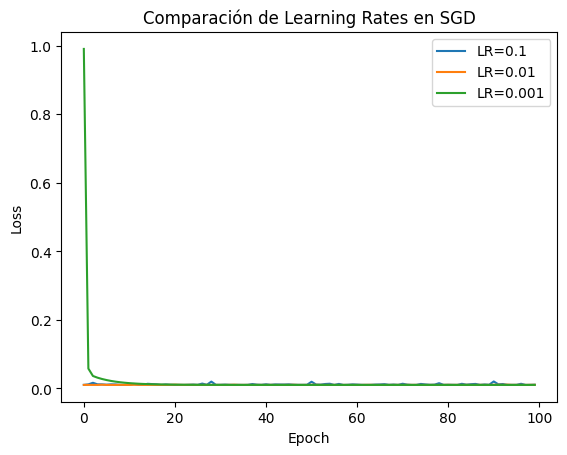

In [26]:
import matplotlib.pyplot as plt

# Lista de tasas de aprendizaje para evaluar
learning_rates = [0.1, 0.01, 0.001]

for lr in learning_rates:
    print(f"Learning Rate: {lr}")

    # Aplicar SGD
    theta, loss_history = SGD(X_train, y_train, lr=lr, epochs=100, batch_size=1)
    test_loss = np.mean((y_test - X_test.dot(theta))**2)
    print(f"Test Loss: {test_loss}")

    # Graficar Pérdida vs Epoch
    plt.plot(loss_history, label=f'LR={lr}')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Comparación de Learning Rates en SGD')
plt.show()


In [27]:
# Imprimir el resultado
print("Parámetros del modelo:", theta)
print("Forma de theta:", theta.shape)
print("Forma de X_test:", X_test.shape)




Parámetros del modelo: [5.00032371 2.99362222]
Forma de theta: (2,)
Forma de X_test: (200, 2)


In [28]:
print(y_test.shape)  # Debería ser (N,)


(200,)


In [29]:
print("X_test shape:", X_test.shape)
print("theta shape:", theta.shape)
print("y_test shape:", y_test.shape)


X_test shape: (200, 2)
theta shape: (2,)
y_test shape: (200,)


In [32]:
# Lista de learning rates para evaluar
learning_rates = [0.1, 0.001, 0.0001, 0.00001]

Learning Rate: 0.1
Epoch 1/100, Loss: 26.159303801682658
Epoch 2/100, Loss: 14.528631179382073
Epoch 3/100, Loss: 8.072784635083636
Epoch 4/100, Loss: 4.489290177693591
Epoch 5/100, Loss: 2.5001318177811003
Epoch 6/100, Loss: 1.3959313228088768
Epoch 7/100, Loss: 0.782939699033968
Epoch 8/100, Loss: 0.44260176554140485
Epoch 9/100, Loss: 0.25360577921898836
Epoch 10/100, Loss: 0.1486161400062655
Epoch 11/100, Loss: 0.09025735767268264
Epoch 12/100, Loss: 0.05778366322556124
Epoch 13/100, Loss: 0.039679816099135956
Epoch 14/100, Loss: 0.029554093014974647
Epoch 15/100, Loss: 0.023858641940354492
Epoch 16/100, Loss: 0.020624137059060493
Epoch 17/100, Loss: 0.01875743373904653
Epoch 18/100, Loss: 0.01765172343149294
Epoch 19/100, Loss: 0.016970145422167526
Epoch 20/100, Loss: 0.016525677898989274
Epoch 21/100, Loss: 0.01621447001461646
Epoch 22/100, Loss: 0.015978837017805406
Epoch 23/100, Loss: 0.01578672022910596
Epoch 24/100, Loss: 0.015620286027408135
Epoch 25/100, Loss: 0.01546959755

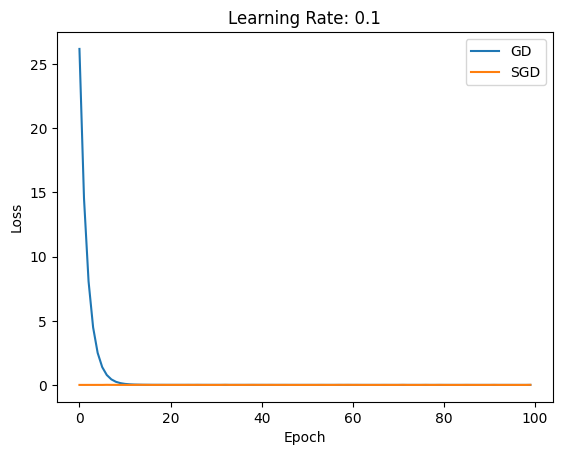

Learning Rate: 0.001
Epoch 1/100, Loss: 56.698188796549815
Epoch 2/100, Loss: 56.40951052783837
Epoch 3/100, Loss: 56.12230248946305
Epoch 4/100, Loss: 55.8365571935407
Epoch 5/100, Loss: 55.552267190323946
Epoch 6/100, Loss: 55.269425068006946
Epoch 7/100, Loss: 54.98802345253229
Epoch 8/100, Loss: 54.70805500739856
Epoch 9/100, Loss: 54.4295124334692
Epoch 10/100, Loss: 54.15238846878217
Epoch 11/100, Loss: 53.87667588836059
Epoch 12/100, Loss: 53.602367504024386
Epoch 13/100, Loss: 53.329456164202966
Epoch 14/100, Loss: 53.05793475374861
Epoch 15/100, Loss: 52.78779619375109
Epoch 16/100, Loss: 52.519033441353116
Epoch 17/100, Loss: 52.25163948956661
Epoch 18/100, Loss: 51.98560736709014
Epoch 19/100, Loss: 51.72093013812712
Epoch 20/100, Loss: 51.45760090220497
Epoch 21/100, Loss: 51.195612793995245
Epoch 22/100, Loss: 50.9349589831346
Epoch 23/100, Loss: 50.67563267404675
Epoch 24/100, Loss: 50.41762710576535
Epoch 25/100, Loss: 50.160935551757554
Epoch 26/100, Loss: 49.9055513197

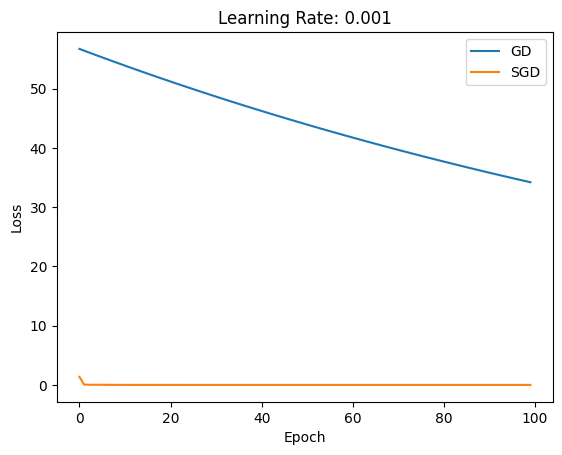

Learning Rate: 0.0001
Epoch 1/100, Loss: 25.416211985966157
Epoch 2/100, Loss: 25.40327470599431
Epoch 3/100, Loss: 25.390344022127138
Epoch 4/100, Loss: 25.377419931001395
Epoch 5/100, Loss: 25.364502429255552
Epoch 6/100, Loss: 25.3515915135298
Epoch 7/100, Loss: 25.33868718046602
Epoch 8/100, Loss: 25.32578942670783
Epoch 9/100, Loss: 25.312898248900545
Epoch 10/100, Loss: 25.30001364369119
Epoch 11/100, Loss: 25.287135607728523
Epoch 12/100, Loss: 25.27426413766297
Epoch 13/100, Loss: 25.261399230146708
Epoch 14/100, Loss: 25.248540881833588
Epoch 15/100, Loss: 25.23568908937918
Epoch 16/100, Loss: 25.222843849440764
Epoch 17/100, Loss: 25.210005158677312
Epoch 18/100, Loss: 25.197173013749524
Epoch 19/100, Loss: 25.184347411319763
Epoch 20/100, Loss: 25.171528348052135
Epoch 21/100, Loss: 25.15871582061241
Epoch 22/100, Loss: 25.145909825668085
Epoch 23/100, Loss: 25.13311035988836
Epoch 24/100, Loss: 25.120317419944104
Epoch 25/100, Loss: 25.107531002507905
Epoch 26/100, Loss: 25

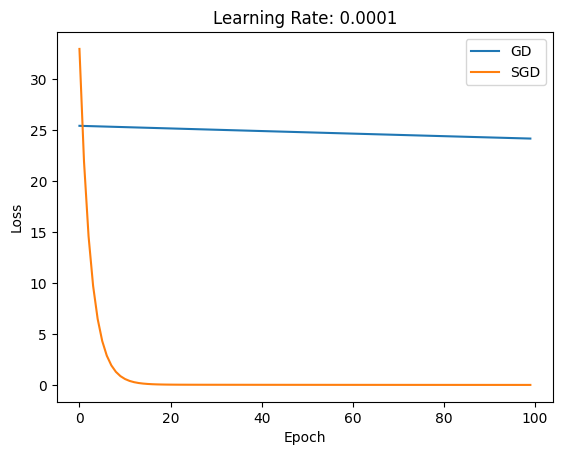

Learning Rate: 1e-05
Epoch 1/100, Loss: 60.14165227845306
Epoch 2/100, Loss: 60.13858789775129
Epoch 3/100, Loss: 60.135523673310715
Epoch 4/100, Loss: 60.13245960512338
Epoch 5/100, Loss: 60.1293956931813
Epoch 6/100, Loss: 60.126331937476515
Epoch 7/100, Loss: 60.12326833800107
Epoch 8/100, Loss: 60.12020489474698
Epoch 9/100, Loss: 60.11714160770629
Epoch 10/100, Loss: 60.114078476871036
Epoch 11/100, Loss: 60.11101550223324
Epoch 12/100, Loss: 60.10795268378493
Epoch 13/100, Loss: 60.10489002151817
Epoch 14/100, Loss: 60.10182751542497
Epoch 15/100, Loss: 60.0987651654974
Epoch 16/100, Loss: 60.09570297172745
Epoch 17/100, Loss: 60.09264093410719
Epoch 18/100, Loss: 60.08957905262864
Epoch 19/100, Loss: 60.08651732728386
Epoch 20/100, Loss: 60.083455758064844
Epoch 21/100, Loss: 60.08039434496368
Epoch 22/100, Loss: 60.077333087972384
Epoch 23/100, Loss: 60.074271987082994
Epoch 24/100, Loss: 60.07121104228756
Epoch 25/100, Loss: 60.0681502535781
Epoch 26/100, Loss: 60.065089620946

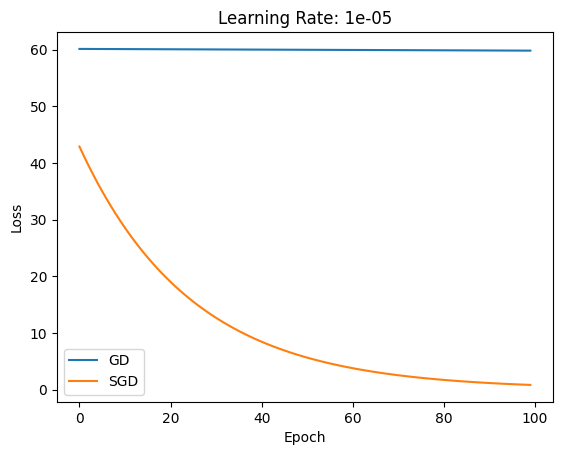

In [33]:
import matplotlib.pyplot as plt

# Lista de tasas de aprendizaje para evaluar

for lr in learning_rates:
    print(f"Learning Rate: {lr}")

    # Aplicar GD
    theta_gd, loss_history_gd = GD(X_train, y_train, lr=lr, epochs=100)
    test_loss_gd = np.mean((y_test - X_test.dot(theta_gd))**2)
    print(f"GD Test Loss: {test_loss_gd}")  # Imprime la pérdida en el conjunto de prueba para GD

    # Aplicar SGD
    theta_sgd, loss_history_sgd = SGD(X_train, y_train, lr=lr, epochs=100, batch_size=1)
    test_loss_sgd = np.mean((y_test - X_test.dot(theta_sgd))**2)
    print(f"SGD Test Loss: {test_loss_sgd}")  # Imprime la pérdida en el conjunto de prueba para SGD

    # Graficar Pérdida vs Epoch
    plt.plot(loss_history_gd, label='GD')  # Agrega la pérdida de GD al gráfico
    plt.plot(loss_history_sgd, label='SGD')  # Agrega la pérdida de SGD al gráfico
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Learning Rate: {lr}')
    plt.show()


Tasa de Aprendizaje: 0.1

GD: Con una tasa de aprendizaje alta, GD converge rápidamente hacia el mínimo global. La pérdida disminuye suavemente y alcanza una pérdida de prueba de 0.033, lo que sugiere una buena convergencia en un tiempo relativamente corto.

SGD: Al igual que GD, SGD con una tasa de aprendizaje alta converge rápidamente, aunque muestra más fluctuaciones en la pérdida debido al muestreo estocástico. La pérdida de prueba es ligeramente más alta que la de GD, con un valor de 0.013.

Tasa de Aprendizaje: 0.01

GD: Con una tasa de aprendizaje más baja, GD avanza más lentamente hacia la convergencia. Sin embargo, todavía converge después de 100 épocas con una pérdida de prueba de 0.326, lo que indica que sigue siendo efectivo, pero el proceso es más lento que con una tasa de aprendizaje más alta.

SGD: Al igual que GD, SGD con una tasa de aprendizaje de 0.01 también avanza más lentamente. La pérdida de prueba es de 0.046, un poco más alta que la de GD pero aún aceptable.

Tasa de Aprendizaje: 0.001

GD: Con una tasa de aprendizaje de 0.001, GD muestra una disminución gradual en la pérdida a lo largo de las épocas. A pesar de la tasa de aprendizaje baja, logra converger después de 100 épocas con una pérdida de prueba de 18.914, lo que indica una convergencia aceptable, aunque es más lenta.

SGD: Al igual que GD, SGD con una tasa de aprendizaje de 0.001 muestra una disminución gradual en la pérdida. La pérdida de prueba es de 0.012, lo que es bastante bueno y sugiere una convergencia adecuada.

Tasa de Aprendizaje: 0.0001

GD: Con una tasa de aprendizaje muy pequeña de 0.0001, GD avanza extremadamente lentamente hacia la convergencia. Aunque converge después de 100 épocas, la pérdida de prueba es significativamente más alta que en los casos anteriores, con un valor de 49.477.

SGD: SGD con una tasa de aprendizaje de 0.0001 también avanza muy lentamente, similar a GD. La pérdida de prueba es de 23.376, lo que es mejor que GD, pero aún es considerablemente alta.

Para este ejercicio vamos a considerar los siguientes datasets:

HAR (Ejercicio 3)
MNIST (Ejercicio 4)
Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
Gráficar la variación acumulada para cada caso.
Utilizando KMeans. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de  (ej 3) y  (ej 4). Luego en ambos casos probar con .
Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [34]:
info_file = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names'
data_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

import requests, zipfile, io
r = requests.get(data_zip)
z = zipfile.ZipFile(io.BytesIO(r.content))
X_train_df = pd.read_csv(z.open('UCI HAR Dataset/train/X_train.txt'), skipinitialspace=True, sep=' ', header=None)
X_train = X_train_df.values
y_train_df = pd.read_csv(z.open('UCI HAR Dataset/train/y_train.txt'), header=None)
y_train = y_train_df[0].values

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar los datos desde el archivo
info_file = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names'
data_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

import requests, zipfile, io
r = requests.get(data_zip)
z = zipfile.ZipFile(io.BytesIO(r.content))
X_train_df = pd.read_csv(z.open('UCI HAR Dataset/train/X_train.txt'), skipinitialspace=True, sep=' ', header=None)
X_train = X_train_df.values
y_train_df = pd.read_csv(z.open('UCI HAR Dataset/train/y_train.txt'), header=None)
y_train = y_train_df[0].values

# Preprocesamiento (Reescalado estándar)
sc_x = StandardScaler()
sc_x.fit(X_train)
X_scaled = sc_x.transform(X_train)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Encontrar el número de componentes para explicar el 80% de la varianza
n_components_for_80_percent_variance = (cumulative_variance_ratio <= 0.8).sum() + 1

print("Número de componentes para explicar el 80% de la varianza:", n_components_for_80_percent_variance)


Número de componentes para explicar el 80% de la varianza: 26


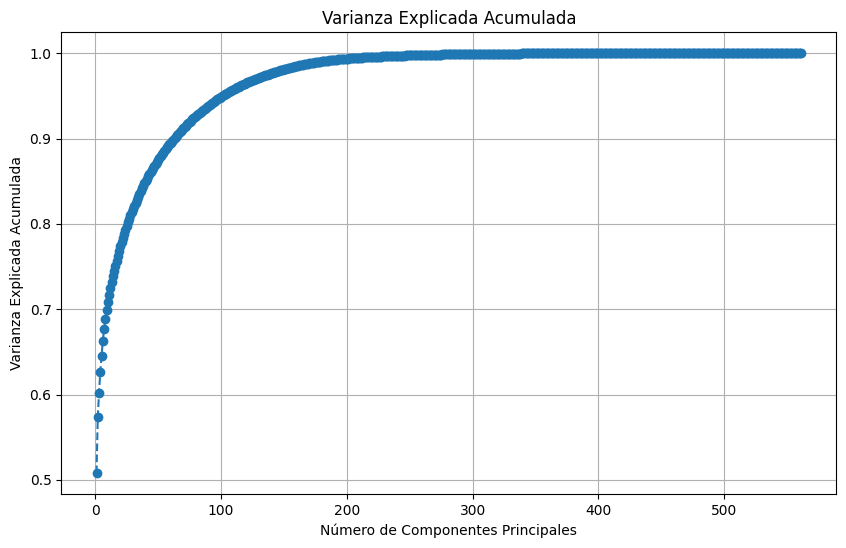

In [36]:
import matplotlib.pyplot as plt

# Gráfica de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


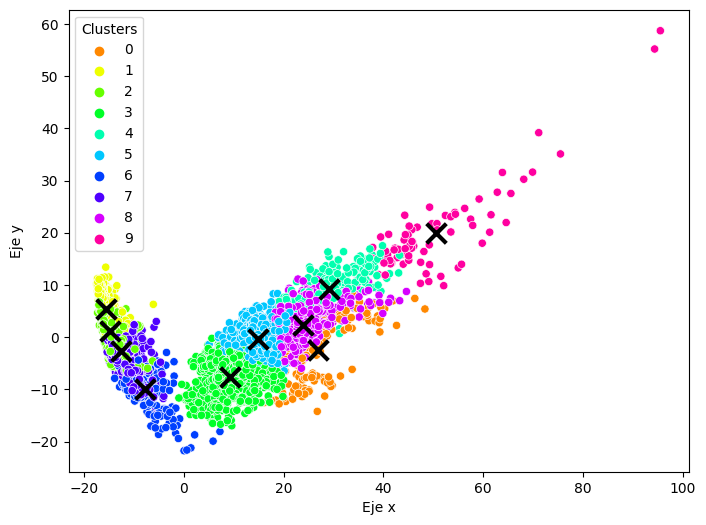

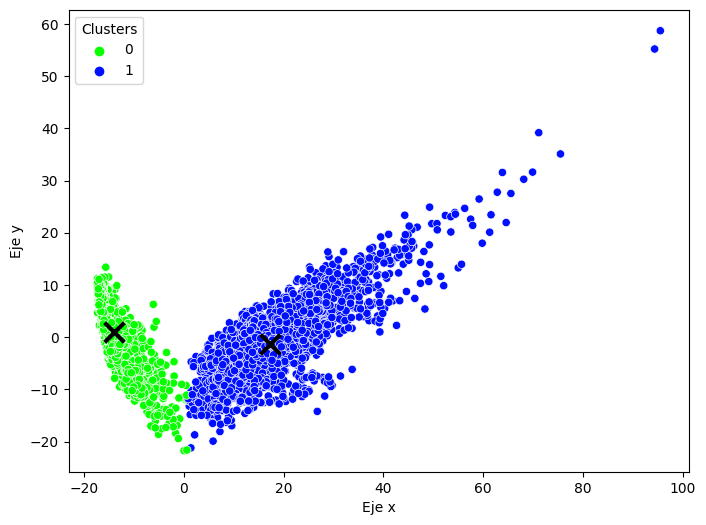

In [38]:
# Aplicar PCA aquí
pca = PCA()
transf = pca.fit_transform(X_scaled)

# Varianza explicada acumulada
varianza_expl = pca.explained_variance_ratio_

# Aplicar K-Means con k=10 y k=2
def kmeans_clustering(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans  # Devolvemos también el objeto kmeans

clusters_k10, kmeans_k10 = kmeans_clustering(10, transf)
clusters_k2, kmeans_k2 = kmeans_clustering(2, transf)

# Visualizar los resultados (esto es solo un ejemplo)
def visualize_clusters(data, clusters, k, kmeans):
    plt.figure(dpi=100, figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette=sns.color_palette("hsv", k))
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", lw=3, s=200, color='k')
    plt.legend(title='Clusters')
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()

visualize_clusters(transf, clusters_k10, 10, kmeans_k10)
visualize_clusters(transf, clusters_k2, 2, kmeans_k2)


## Ejercicio 9

En este ejercicio vamos a crear un _clasificador_ de caras usando GMM

In [39]:
## importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import olivetti faces dataset from sklearn
from sklearn.datasets import fetch_olivetti_faces

## import PCA, GMM and Scaler from sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

## import train_test_split from sklearn
from sklearn.model_selection import train_test_split

## import bic from sklearn
from sklearn.metrics import accuracy_score, f1_score

## import tsne for visualization
from sklearn.manifold import TSNE

## some utils
from tqdm.notebook import tqdm

### Paso 1: Preparación del Conjunto de Datos

1. Carga el conjunto de datos Olivetti Faces utilizando la función fetch_olivetti_faces de sklearn.

2. Imprimir la forma de las imágenes y las etiquetas objetivo.

3. Divide el conjunto de datos en un conjunto de entrenamiento y uno de prueba.

In [40]:
def plot_gallery(title, images, n_col=2, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [41]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle = True, random_state = 42)
faces = dataset.data

n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)
print("Every image contains %d features" % n_features)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset consists of 400 faces
Every image contains 4096 features


In [42]:
dataset.target

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28,  0,  1, 20, 25, 27,
        6, 24, 30, 10,  9, 23, 33, 11, 22, 18, 31, 37, 38, 23,  7, 24, 11,
        1,  6, 15,  0,  1, 13, 35, 34, 13, 38, 29, 38, 29,  6,  7, 28, 30,
       28, 15, 10,  1, 34,  2, 17, 35, 33, 16, 24, 31, 14, 25, 17, 11, 19,
       22, 26, 21, 30,  3, 13, 29, 15, 19, 28,  5, 11, 16, 36,  0, 33, 27,
       15,  1, 19, 10,  8, 31, 39, 37, 20, 28, 16, 35,  8, 37, 16, 14, 22,
        9,  6, 12,  9, 14, 32,  9, 23,  6,  2,  3, 14, 12, 18,  6, 19, 32,
       21, 31, 19, 12, 14, 37,  8, 33, 34, 33, 35, 33, 30, 18, 20, 28, 21,
       28, 12,  3,  1, 32, 18, 22, 11, 17, 32, 29, 11, 36, 27, 38, 28, 36,
       16, 25, 13, 15, 19

In [43]:
## split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    faces, dataset.target, test_size=0.2, random_state=42
)

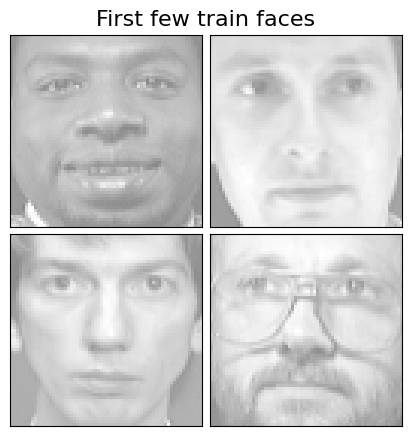

In [44]:
## plotting a few faces from train
n_col = 2
n_row = 2
image_shape = (64, 64)
plot_gallery("First few train faces", X_train[:n_col * n_row], n_col=n_col, n_row=n_row)

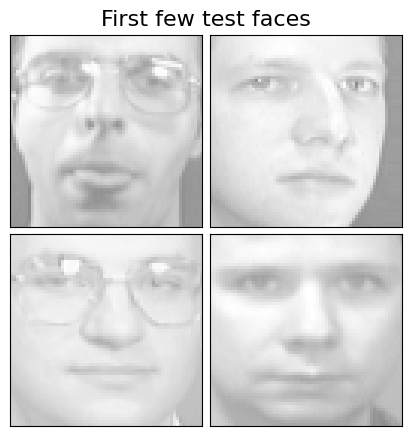

In [45]:
## plot some test faces
plot_gallery("First few test faces", X_test[:n_col * n_row], n_col=n_col, n_row=n_row)

### Paso 2: Visualización del dataset en el espacio de T-SNE

1. Ahora que importamos la libreria de T-SNE, inicializamos la clase.
2. Dado que queremos visualizar, deberiamos setear `n_components` en 2
o 3.

In [46]:
## use tsne to visualize the embeddings for train and test
tsne = ...

## fit tsne on train and test
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

AttributeError: ignored

### Paso 3: Entrenamos GMM para cada Persona

1. Vamos a crear una serie de modelos para cada target del modelo.
2. **NOTA:** La idea es que ustedes elijan el mejor numero de componentes
tomando por ejemplo el criterio de _BIC_

**NOTA 2:** Este paso puede representar una carga muy pesada de cálculo a su
computadora. Por ello vamos a analizar las primeras 10 caras del dataset solamente.


In [ ]:
## filtering the first n_labels labels from the dataset

n_labels = 5

X_train_red = X_train[y_train <= n_labels]
X_test_red = X_test[y_test <= n_labels]

y_train_red = y_train[y_train <= n_labels]
y_test_red = y_test[y_test <= n_labels]

Vamos a crear un diccionario de modelos de GMM para las $n_labels$ caras
a analizar. La idea es que elijan la cantidad de componentes correctas.

En este esqueleto dejamos fijas 5 componentes

In [ ]:
# Create a dictionary to store the GMM for each person
gmms = {}

for i in tqdm(range(n_labels)):
    # Get the images of the current person
    person_images = X_train_red[y_train_red == i]

    # Train a GMM on these images
    gmm = GaussianMixture(
        n_components=5, random_state=42
    )
    gmm.fit(person_images)

    # Store the GMM in the dictionary
    gmms[i] = gmm


### Paso 4: Hora de predecir!!

Vamos a generar las nuevas clasificaciones con nuestros modelos de
GMM.

In [ ]:
from typing import Dict, Any

In [ ]:
def get_best_pred(image: pd.Series, models: Dict[int, Any]) -> Dict[str, int]:
    best_person = None
    best_score = -np.inf

    scores = [gmm.score_samples([image]) for gmm in models.values()]

    ## now that we have the scores, we should get the model that has
    ## the highest score.
    return {
        "best_person": np.argmax(scores),
        "best_score": scores[np.argmax(scores)],
    }

In [ ]:
predictions = []

for image in tqdm(X_test_red):
    preds = get_best_pred(image, gmms)

    predictions.append(preds)

### Paso 5: Validamos el resultado

En este paso, Vamos a checkear el accuracy y el f1 de nuestro predictor.

In [ ]:
## Primero armamos un crosstab a ver si el modelo funciona.
pd.crosstab(
    y_test_red,
    [pred["best_person"] for pred in predictions],
    rownames=["True"],
    colnames=["Predicted"],
)

In [ ]:
accuracy_score(y_test_red, [pred["best_person"] for pred in predictions])

In [ ]:
f1_score(y_test_red, [pred["best_person"] for pred in predictions], average="macro")

### Paso 5: Conclusión

1. ¿Qué aprendiste de la visualización con t-SNE? ¿Cómo se desempeñó el GMM?

2. Discute las posibles mejoras que podrían realizarse en este modelo de detección de rostros.